<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/NY_OilProduction_EDA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('NYC_production_data.csv')

In [78]:
df.head(2)

,Production Year,Production Date Entered,Operator,County,Town,Field,Producing Formation,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",Purchaser Codes,Location
0,1995,12/03/1996,"Buffalo China, Inc.",Erie,BUFFALO,BUFFALO,MEDINA,0,0,1,0,0,0,YES,0,106,0,0,NaN,"BUFFALO, NY\n(42.887691, -78.879374)"
1,1995,03/29/1996,"Copper Ridge Oil, Inc.",Steuben,WEST UNION,BEECH HILL-INDEPENDENCE,FULMER VALLEY,28,0,0,0,7,0,NO,1229,0,180,0,OA,"WEST UNION, NY\n(42.094951, -77.725816)"


In [ ]:
df.columns

Index(['Production Year', 'Production Date Entered', 'Operator', 'County',
       'Town', 'Field', 'Producing Formation', 'Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells', 'Self-use Well',
       'Oil Produced, bbl', 'Gas Produced, Mcf', 'Water produced, bbl',
       'Taxable Gas, Mcf', 'Purchaser Codes', 'Location'],
      dtype='object')

In [ ]:
df_fieldwise =df.groupby('Field').sum()[['Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells',
       'Oil Produced, bbl', 'Gas Produced, Mcf', 'Water produced, bbl']]

In [ ]:
df_fieldwise = df_fieldwise.reset_index()

In [ ]:
df_fieldwise.describe()

,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl"
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,2.290000e+02,2.290000e+02,2.290000e+02
mean,634.161572,171.323144,479.475983,73.366812,164.676856,2.157205,1.045585e+05,2.321356e+06,7.683766e+05
std,4062.208758,1261.559589,4142.535459,507.718621,1229.832948,19.989947,6.970628e+05,1.960174e+07,7.553171e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000e+00,8.380000e+02,0.000000e+00
50%,0.000000,0.000000,16.000000,10.000000,0.000000,0.000000,0.000000e+00,3.208500e+04,0.000000e+00
75%,0.000000,1.000000,93.000000,43.000000,0.000000,0.000000,0.000000e+00,4.311700e+05,8.540000e+02
max,39932.000000,16362.000000,62112.000000,7590.000000,11378.000000,226.000000,7.891700e+06,2.942136e+08,9.956594e+07


In [ ]:
df_fieldwise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Field                229 non-null    object
 1   Active Oil Wells     229 non-null    int64 
 2   Inactive Oil Wells   229 non-null    int64 
 3   Active Gas Wells     229 non-null    int64 
 4   Inactive Gas Wells   229 non-null    int64 
 5   Injection Wells      229 non-null    int64 
 6   Disposal Wells       229 non-null    int64 
 7   Oil Produced, bbl    229 non-null    int64 
 8   Gas Produced, Mcf    229 non-null    int64 
 9   Water produced, bbl  229 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 18.0+ KB


In [ ]:
# df_fieldwise['Active Oil Wells'].sort_values(ascending=False).values # A lot of fields have no oil wells
# df_fieldwise['Active Gas Wells'].sort_values(ascending=False).values
df_fieldwise['Active Gas Wells'].sort_values(ascending=False).values

array([62112,  5902,  4263,  4257,  2926,  1887,  1853,  1775,  1485,
        1453,  1444,  1255,  1253,  1127,   833,   829,   820,   806,
         728,   703,   622,   608,   475,   398,   387,   380,   359,
         345,   312,   296,   288,   278,   276,   275,   262,   246,
         229,   223,   219,   199,   198,   166,   164,   158,   156,
         155,   152,   150,   145,   141,   126,   116,   114,   106,
         105,   103,   101,    93,    92,    90,    89,    88,    87,
          85,    79,    75,    75,    74,    68,    62,    60,    58,
          54,    51,    48,    48,    47,    46,    46,    46,    41,
          40,    39,    39,    38,    38,    37,    35,    35,    34,
          33,    32,    32,    31,    29,    29,    28,    27,    25,
          23,    22,    22,    22,    21,    21,    20,    19,    19,
          19,    18,    18,    18,    17,    16,    16,    15,    15,
          15,    15,    15,    15,    14,    14,    14,    12,    12,
          11,    11,

In [ ]:
df_fieldwise[df_fieldwise['Active Oil Wells']>=35]

,Field,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl"
8,ALMA,3310,545,0,2,1753,15,788873,133,3562159
9,ANDOVER,603,400,23,3,36,0,31809,50577,30752
20,BEECH HILL-INDEPENDENCE,9862,595,829,245,1233,3,1184558,2651569,1312916
30,BRADFORD,39932,8511,345,294,10442,6,7891700,6561339,99565944
33,BROWNING,633,145,3,0,0,0,2757,303,7200
38,BUSTI,10097,683,806,151,0,0,1302727,1902421,53128
47,CERES,80,22,9,18,0,0,5169,5134,16265
50,CHIPMUNK,23004,4411,164,61,11378,0,6087275,833795,56057400
53,CLARKSVILLE,297,165,29,19,0,0,35654,455732,127294
54,CLYMER,66,6,275,166,0,4,213901,3527698,101844


In [ ]:
df_producingFields = df_fieldwise[(df_fieldwise['Active Gas Wells']>0)&(df_fieldwise['Active Oil Wells']>0)]

In [ ]:
df_producingFields.head()

,Field,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl"
9,ANDOVER,603,400,23,3,36,0,31809,50577,30752
20,BEECH HILL-INDEPENDENCE,9862,595,829,245,1233,3,1184558,2651569,1312916
28,BIXBY HILL,2,0,1,0,0,0,12073,7361,1
30,BRADFORD,39932,8511,345,294,10442,6,7891700,6561339,99565944
32,BRANT-EDEN,11,0,4263,294,0,0,0,10824685,77423


In [ ]:
df_producingFields.columns

Index(['Field', 'Active Oil Wells', 'Inactive Oil Wells', 'Active Gas Wells',
       'Inactive Gas Wells', 'Injection Wells', 'Disposal Wells',
       'Oil Produced, bbl', 'Gas Produced, Mcf', 'Water produced, bbl'],
      dtype='object')

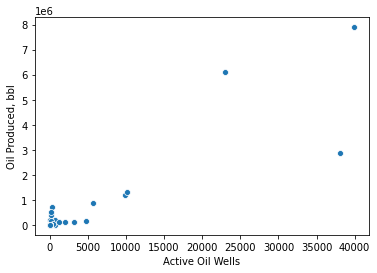

In [ ]:
sns.scatterplot(y='Oil Produced, bbl',x='Active Oil Wells',data = df_producingFields)
# sns.scatterplot(y='Gas Produced, Mcf',x='Active Gas Wells',data = df_producingFields)

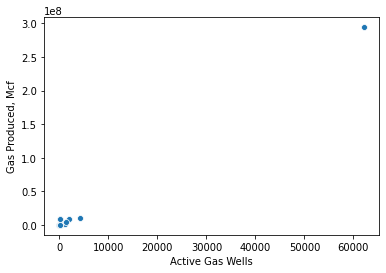

In [ ]:
sns.scatterplot(y='Gas Produced, Mcf',x='Active Gas Wells',data = df_producingFields)

In [ ]:
#So majority of oil wells are between 0-15000 and gas wells bwetween 0-10000

In [ ]:
df_yearwise = df.groupby(by='Production Year').sum()[['Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells',
       'Oil Produced, bbl', 'Gas Produced, Mcf', 'Water produced, bbl']]
df_yearwise = df_yearwise.reset_index()

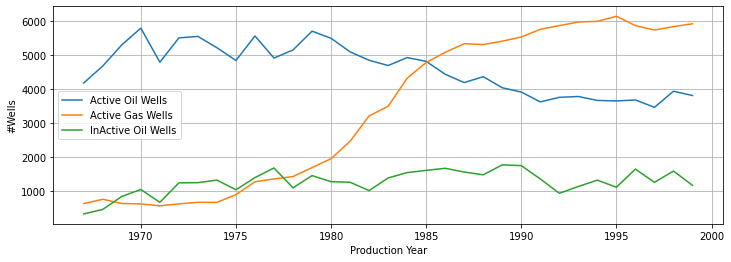

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(x='Production Year',y ='Active Oil Wells',data=df_yearwise,label='Active Oil Wells' )
sns.lineplot(x='Production Year',y ='Active Gas Wells',data=df_yearwise,label='Active Gas Wells')
sns.lineplot(x='Production Year',y ='Inactive Oil Wells',data=df_yearwise,label='InActive Oil Wells' )
plt.grid()
plt.ylabel('#Wells')
plt.legend(loc='best')

#Conclusion - A visibly evident drop in number of oil wells after 1980
#Conclusion - A visibly evident rise in number of oil wells after 1980

In [ ]:
df_yearwise['Liquid produced, bbl'] = df_yearwise['Oil Produced, bbl'] + df_yearwise['Water produced, bbl']

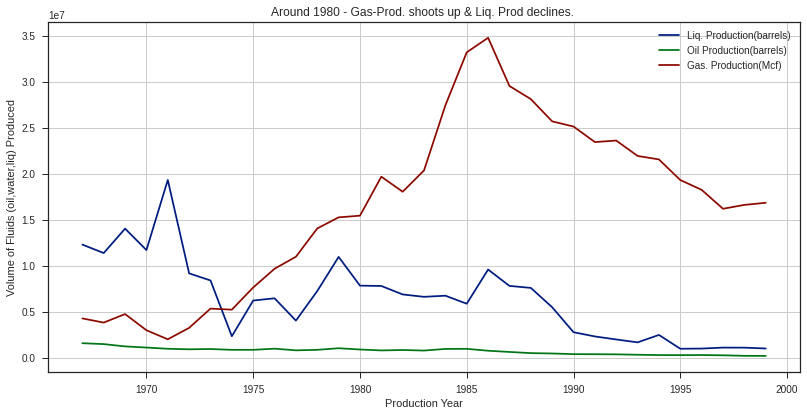

In [76]:
plt.figure(figsize=(12,6))
# plt.grid()
plt.style.use('seaborn-dark-palette')
sns.lineplot(data=df_yearwise,x='Production Year',y='Liquid produced, bbl',label = 'Liq. Production(barrels)')
sns.lineplot(data=df_yearwise,x='Production Year',y='Oil Produced, bbl',label = 'Oil Production(barrels)')
sns.lineplot(data=df_yearwise,x='Production Year',y='Gas Produced, Mcf',label = 'Gas. Production(Mcf)')

plt.ylabel('Volume of Fluids (oil,water,liq) Produced')
plt.title('Around 1980 - Gas-Prod. shoots up & Liq. Prod declines. ')

plt.grid()

In [77]:
# plt.style.available

In [82]:
#Now let's analyse it date-wise. 
df['Date'] = pd.to_datetime(df['Production Date Entered'])

In [90]:
 df = df.sort_values(by='Date')

In [91]:
df.head(3)

,Production Year,Production Date Entered,Operator,County,Town,Field,Producing Formation,Active Oil Wells,Inactive Oil Wells,Active Gas Wells,Inactive Gas Wells,Injection Wells,Disposal Wells,Self-use Well,"Oil Produced, bbl","Gas Produced, Mcf","Water produced, bbl","Taxable Gas, Mcf",Purchaser Codes,Location,Date,"Liquid produced, bbl"
14097,1983,01/31/1984,Baker & Odonnell Dev. Co.,Allegany,ALMA,RICHBURG,RICHBURG,15,15,0,0,20,0,NO,208,0,925,0,NaN,"ALMA, NY\n(42.012207, -78.060759)",1984-01-31,1133
15341,1983,01/31/1984,CNG Transmission Corp.,Allegany,ALMA,STATE LINE,ORISKANY,0,0,0,1,0,0,INACTIVE,0,0,0,0,NaN,"ALMA, NY\n(42.012207, -78.060759)",1984-01-31,0
15625,1983,01/31/1984,Patrick Petroleum Corp. of Michigan,Allegany,SCIO,GORDON BROOK,ORISKANY,0,0,1,0,0,0,NO,0,18048,2000,0,NaN,"SCIO, NY\n(42.171429, -77.97865)",1984-01-31,2000


In [92]:
df['Liquid produced, bbl'] = df['Oil Produced, bbl'] + df['Water produced, bbl']

In [93]:
df.columns

Index(['Production Year', 'Production Date Entered', 'Operator', 'County',
       'Town', 'Field', 'Producing Formation', 'Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells', 'Self-use Well',
       'Oil Produced, bbl', 'Gas Produced, Mcf', 'Water produced, bbl',
       'Taxable Gas, Mcf', 'Purchaser Codes', 'Location', 'Date',
       'Liquid produced, bbl'],
      dtype='object')

In [94]:
df_datewise = df.groupby(by='Date').sum()[['Active Oil Wells',
       'Inactive Oil Wells', 'Active Gas Wells', 'Inactive Gas Wells',
       'Injection Wells', 'Disposal Wells',
       'Oil Produced, bbl', 'Gas Produced, Mcf', 'Water produced, bbl']]


In [97]:
df_datewise.head(4)
df_datewise.reset_index(inplace=True)

In [99]:
df_datewise['Liquid produced, bbl'] = df_datewise['Oil Produced, bbl'] + df_datewise['Water produced, bbl']

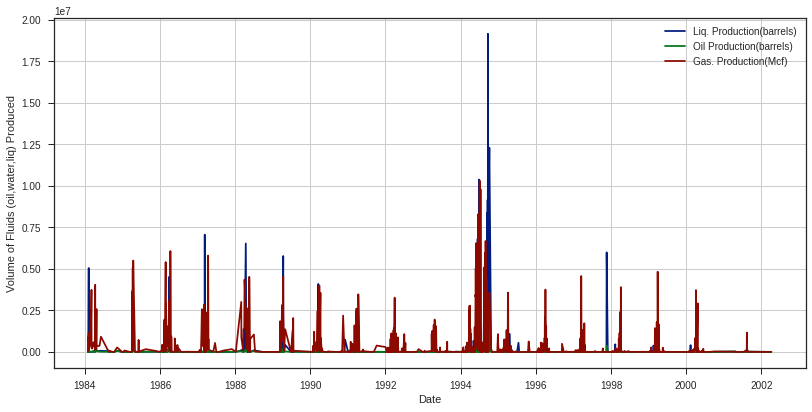

In [107]:
plt.figure(figsize=(12,6))
# plt.grid()

sns.lineplot(data=df_datewise,x='Date',y='Liquid produced, bbl',label = 'Liq. Production(barrels)')
sns.lineplot(data=df_datewise,x='Date',y='Oil Produced, bbl',label = 'Oil Production(barrels)')
sns.lineplot(data=df_datewise,x='Date',y='Gas Produced, Mcf',label = 'Gas. Production(Mcf)')

plt.ylabel('Volume of Fluids (oil,water,liq) Produced')
# plt.title('Around 1980 - Gas-Prod. shoots up & Liq. Prod declines. ')

plt.grid()

In [108]:
#You can see an observable Production peak somewhere from 1992-1996
#However don't get confused with the peaks. Don't compare the magnitudes 
# since liquids are in barrels and gas is in Mcf

In [110]:
# sns.(data=df_datewise,x='Date',y='Liquid produced, bbl',label = 'Liq. Production(barrels)')

In [109]:
#### End of Part 1 ####